In [4]:
# add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier


In [5]:
data_file = './data/GSE66099.csv'
degs_file = './gene_diff_data.csv'
# data pre-processing
norm_filter = MinMaxScaler()

label = 'Died'
num_features = 10

DEGs = pd.read_csv(degs_file)
degs_gene_id = DEGs["X"]

data = pd.read_csv(data_file)
degs_gene_data = data[degs_gene_id]
degs_gene_data.loc[:,"label"]  = data[label]
degs_gene_data

C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,label
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.transform(data))

MinMaxScaler()
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [8]:
# split data 7/3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# y = degs_gene_data.iloc[:,108].values
X, y = degs_gene_data.iloc[:,0:108].values, degs_gene_data.iloc[:,108].values

# Normalize data
mm = MinMaxScaler()
mm.fit(X)
X_ = mm.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3, random_state=1234,
                                                   shuffle=True, stratify=y)

In [9]:
X_

array([[0.57697486, 0.34433825, 0.61513556, ..., 0.40091366, 0.20974908,
        0.17101969],
       [0.56674423, 0.03274116, 0.72320089, ..., 0.46379284, 0.12501523,
        0.38131577],
       [0.86814946, 0.08490889, 0.69300869, ..., 0.24478979, 0.25499418,
        0.25409926],
       ...,
       [0.34651585, 0.81422575, 0.40625859, ..., 0.26286847, 0.08681668,
        0.17778783],
       [0.21307966, 0.12687091, 0.37075729, ..., 0.31621004, 0.26356147,
        0.33536072],
       [0.20540484, 0.07980607, 0.35282589, ..., 0.15933786, 0.21767935,
        0.20460477]])

In [25]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,0.393239,0.043367,0.750394,0.057558,0.758201,0.151733,0.190277,0.584129,0.791770,0.354312,...,0.210145,0.608228,0.500949,0.489528,0.906520,0.539472,0.638975,0.539266,0.600088,0.949873
1,0.326627,0.078190,0.440107,0.022222,0.220582,0.071600,0.845126,0.508473,0.208496,0.136352,...,0.366726,0.226045,0.124869,0.686099,0.712927,0.130329,0.216578,0.058211,0.028148,0.175808
2,0.291350,0.382475,0.195437,0.273424,0.159836,0.068425,0.740780,0.222803,0.168297,0.080475,...,0.190698,0.229310,0.160819,0.681419,0.418838,0.128583,0.099180,0.155510,0.272185,0.293026
3,0.075038,0.303574,0.199618,0.230697,0.229144,0.129347,0.854857,0.304306,0.212281,0.114555,...,0.209938,0.440485,0.123163,0.627428,0.707258,0.053988,0.189372,0.213784,0.128740,0.153944
4,0.254301,0.484013,0.657063,0.238586,0.322230,0.027077,0.431366,0.507810,0.349073,0.187171,...,0.454191,0.314615,0.182384,0.725432,0.676899,0.147902,0.197477,0.338757,0.238949,0.295368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.437675,0.732919,0.552963,0.500667,0.453641,0.124738,0.779948,0.492242,0.327443,0.157294,...,0.191134,0.327951,0.321868,0.339456,0.710685,0.203249,0.319740,0.151739,0.169583,0.398990
135,0.499111,0.108765,0.370084,0.163719,0.335494,0.115582,0.842982,0.672600,0.296201,0.495734,...,0.334751,0.332651,0.210892,0.504298,0.804306,0.195360,0.250205,0.199672,0.196571,0.319370
136,0.536449,0.079594,0.324067,0.087539,0.318406,0.047349,0.187711,0.523702,0.366003,0.384129,...,0.273161,0.276381,0.284304,0.769976,0.748772,0.181691,0.110133,0.304202,0.260349,0.216802
137,0.271292,0.183380,0.855663,0.350887,0.507578,0.149636,0.897489,0.271187,0.528923,0.061091,...,0.286938,0.474534,0.241468,0.758191,0.644665,0.174664,0.170810,0.268472,0.247060,0.181911


<BarContainer object of 139 artists>

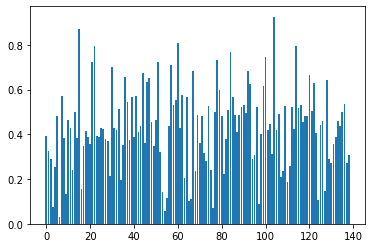

In [26]:
plt.bar(list(range(139)),X_train[0:139,0])

In [27]:
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

print('Training accuracy:', np.mean(rf.predict(X_train) == y_train)*100)
print('Test accuracy:', np.mean(rf.predict(X_test) == y_test)*100)

Training accuracy: 100.0
Test accuracy: 91.66666666666666


In [28]:
# feature importance
fi = rf.feature_importances_
a = [i for i in range(len(fi)) if fi[i] > 0.01]
sg = degs_gene_id[a]

<BarContainer object of 108 artists>

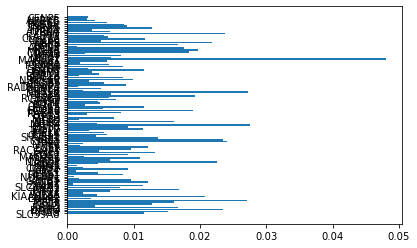

In [29]:
plt.barh(degs_gene_id,rf.feature_importances_)

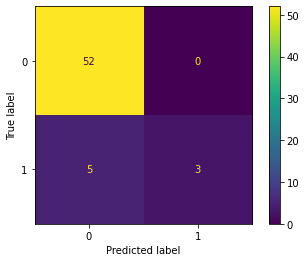

In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Propose Deep learning model

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
dl_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
dl_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Evaluate result

In [58]:
from sklearn.metrics import *
def evaluate(y_probs, y_pred, y_test):
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # mathew correlation coefficients
    mcc = matthews_corrcoef(y_test, y_pred)
 
    auc = roc_auc_score(y_test, y_probs)
    tp = cm[1,1]
    fp = cm[0,1]
    tn = cm[0,0]
    fn = cm[1,0]
    acc = (tn+tp)/(tn+fp+fn+tp)
    ap = tp + fn
    an = tn + fp
    total = ap + an
    # compute sn and sp
    sn = tp/ap
    sp = tn/an

    #calculate AUC score
    return  np.array([acc, sn, sp, mcc, auc, tp, fp, tn, fn])


<ipython-input-33-9b83aeeaff83>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return  np.array([acc, sn, sp, mcc, auc, cm, tp, fp, tn, fn])
<ipython-input-33-9b83aeeaff83>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return  np.array([acc, sn, sp, mcc, auc, cm, tp, fp, tn, fn])


Logistic Regression: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.9166666666666666 0.375 1.0 0.5848976518656018 0.889423076923077
 array([[52,  0],
        [ 5,  3]], dtype=int64) 3 0 52 5]


Logistic Regression 2: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.9 0.25 1.0 0.4734320764739993 0.6923076923076923
 array([[52,  0],
        [ 6,  2]], dtype=int64) 2 0 52 6]




<ipython-input-33-9b83aeeaff83>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return  np.array([acc, sn, sp, mcc, auc, cm, tp, fp, tn, fn])
<ipython-input-33-9b83aeeaff83>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return  np.array([acc, sn, sp, mcc, auc, cm, tp, fp, tn, fn])
<ipython-input-33-9b83aeeaff83>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

RF 100: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.9166666666666666 0.375 1.0 0.5848976518656018 0.7391826923076924
 array([[52,  0],
        [ 5,  3]], dtype=int64) 3 0 52 5]


RF 50: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.9 0.25 1.0 0.4734320764739993 0.7596153846153846
 array([[52,  0],
        [ 6,  2]], dtype=int64) 2 0 52 6]


SVM Linear: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.9 0.25 1.0 0.4734320764739993 0.826923076923077
 array([[52,  0],
        [ 6,  2]], dtype=int64) 2 0 52 6]


SVM RBF: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.8833333333333333 0.125 1.0 0.33191789877230743 0.7788461538461539
 array([[52,  0],
        [ 7,  1]], dtype=int64) 1 0 52 7]


KNN-15 nei: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.8833333333333333 0.125 1.0 0.33191789877230743 0.6790865384615384
 array([[52,  0],
        [ 7,  1]], dtype=int64) 1 0 52 7]


[18:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation m

<ipython-input-33-9b83aeeaff83>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return  np.array([acc, sn, sp, mcc, auc, cm, tp, fp, tn, fn])


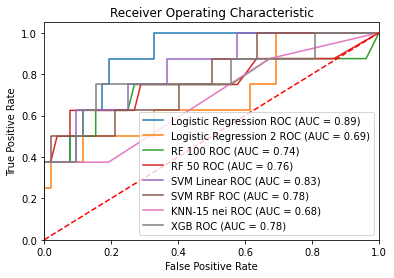

In [34]:
# training with whole data
from sklearn.metrics import *
seed = 7
np.random.seed(seed)
models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(penalty="l2", random_state=0),
    },
    {
        'label': 'Logistic Regression 2',
        'model': SGDClassifier(loss="log", penalty="l2", random_state=0),
    },
    {
        'label' : 'RF 100',
        'model': RandomForestClassifier(n_estimators=100, random_state=0),
    },
    {
        'label' : 'RF 50',
        'model': RandomForestClassifier(n_estimators=50, random_state=0),
    },
    {
        'label' : 'SVM Linear',
        'model': SVC(kernel='linear',probability=True),
    },
    {
        'label' : 'SVM RBF',
        'model': SVC(kernel='rbf',probability=True),
    },
    {
        'label' : 'KNN-15 nei',
        'model': KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=-1),
    },
    {
        'label' : 'XGB',
        'model': XGBClassifier(objective="binary:logistic", n_estimators=100, n_jobs=4, random_state=seed),
    },
]

plt.figure(0).clf()

for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
#     auc = metrics.auc(fpr,tpr)
    score = evaluate(model.predict_proba(X_test)[:,1],y_pred, y_test)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (m['label'], score[4]))

    print("%s: \nEvaluate score:\nACC\tSn\tSp\tMCC\tAUC\n" % (m['label']), score)
    print("\n")
# # Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### Sequential Feature Selection

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Set random seed
seed = 10
np.random.seed(seed)

# model = RandomForestClassifier(n_estimators=100, random_state=0)
model = LogisticRegression(penalty="l2", random_state=seed)


sfs1 = SFS(model,
          k_features = 10,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          n_jobs=-1,
          cv=10)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.8s finished

[2022-03-19 18:55:57] Features: 1/10 -- score: 0.856043956043956[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    1.0s finished

[2022-03-19 18:55:58] Features: 2/10 -- score: 0.856043956043956[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    1.8s finished

[2022-03-19 18:56:00] Features: 3/10 -- score: 0.856043956043956[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  90 out of 1

In [46]:
sfs1.k_feature_idx_

(0, 1, 2, 3, 4, 9, 47, 61, 92, 93)

In [47]:
degs_gene_data.columns[1:][list(sfs1.k_feature_idx_)]

Index(['RHAG', 'DDIT4', 'MPO', 'RRM2', 'CCL3', 'KIAA0101', 'H1F0', 'GINS2',
       'WBP5', 'TARS'],
      dtype='object')

In [48]:
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
metric_dict

{1: {'feature_idx': (0,),
  'cv_scores': array([0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.84615385]),
  'avg_score': 0.856043956043956,
  'feature_names': ('0',),
  'ci_bound': 0.0024485042329284953,
  'std_dev': 0.003296703296703285,
  'std_err': 0.001098901098901095},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.84615385]),
  'avg_score': 0.856043956043956,
  'feature_names': ('0', '1'),
  'ci_bound': 0.0024485042329284953,
  'std_dev': 0.003296703296703285,
  'std_err': 0.001098901098901095},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.84615385]),
  'avg_score': 0.856043956043956,
  'feature_names': ('0', '1', '2'),
  'ci_bound': 0.0024485042329284953,
  'std_

In [49]:
df = pd.DataFrame.from_dict(metric_dict).T
df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.8571428571428571, 0.8571428571428571, 0.857...",0.856044,"(0,)",0.002449,0.003297,0.001099
2,"(0, 1)","[0.8571428571428571, 0.8571428571428571, 0.857...",0.856044,"(0, 1)",0.002449,0.003297,0.001099
3,"(0, 1, 2)","[0.8571428571428571, 0.8571428571428571, 0.857...",0.856044,"(0, 1, 2)",0.002449,0.003297,0.001099
4,"(0, 1, 2, 93)","[0.8571428571428571, 0.9285714285714286, 0.857...",0.863187,"(0, 1, 2, 93)",0.016369,0.02204,0.007347
5,"(0, 1, 2, 4, 93)","[0.8571428571428571, 0.9285714285714286, 0.928...",0.87033,"(0, 1, 2, 4, 93)",0.021763,0.029302,0.009767
6,"(0, 1, 2, 4, 92, 93)","[0.8571428571428571, 0.9285714285714286, 0.928...",0.877473,"(0, 1, 2, 4, 92, 93)",0.02496,0.033606,0.011202
7,"(0, 1, 2, 4, 9, 92, 93)","[0.8571428571428571, 0.9285714285714286, 0.928...",0.884615,"(0, 1, 2, 4, 9, 92, 93)",0.02676,0.03603,0.01201
8,"(0, 1, 2, 4, 9, 61, 92, 93)","[0.8571428571428571, 0.9285714285714286, 0.928...",0.891758,"(0, 1, 2, 4, 9, 61, 92, 93)",0.027439,0.036944,0.012315
9,"(0, 1, 2, 3, 4, 9, 61, 92, 93)","[0.8571428571428571, 0.9285714285714286, 0.928...",0.891758,"(0, 1, 2, 3, 4, 9, 61, 92, 93)",0.027439,0.036944,0.012315
10,"(0, 1, 2, 3, 4, 9, 47, 61, 92, 93)","[0.9285714285714286, 0.9285714285714286, 0.928...",0.898901,"(0, 1, 2, 3, 4, 9, 47, 61, 92, 93)",0.027082,0.036463,0.012154


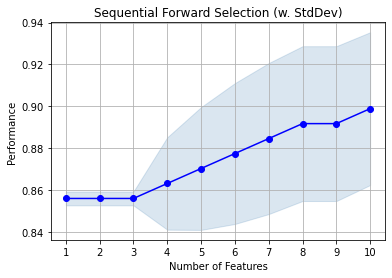

In [50]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [51]:
X_train_sls = sfs1.transform(X_train)
X_test_sls = sfs1.transform(X_test)
print(X_train_sls.shape)
print(y_test.shape)

(139, 10)
(60,)


### K-fold cross validation

In [52]:
X_sls = sfs1.transform(X_train)
X_sls.shape
X_sls

array([[0.39323916, 0.04336657, 0.75039359, ..., 0.51809294, 0.05325409,
        0.05064402],
       [0.32662678, 0.07818974, 0.44010662, ..., 0.24364567, 0.15250022,
        0.11187275],
       [0.29135019, 0.38247523, 0.19543662, ..., 0.0735895 , 0.31727114,
        0.13077366],
       ...,
       [0.53644919, 0.07959396, 0.32406712, ..., 0.25264766, 0.03934354,
        0.17655635],
       [0.27129233, 0.18338037, 0.85566323, ..., 0.38344718, 0.60655709,
        0.30423857],
       [0.30884024, 0.29450522, 0.29601126, ..., 0.34928042, 0.28587453,
        0.08915345]])

In [53]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import interp

num_runs = 10


In [56]:
def cross_validation(X, y, model, num_folds=10, random_state=0, n_runs=1, verbose=False, threshold=0.5):
    res = np.zeros(shape=(num_folds * n_runs, 9)) # 5 number of metrics
    base_fpr = np.linspace(0, 1, 51) #add a new parameter for 51
    tprs = []
    
    count = 0
    for cv_run in range(n_runs):
        skf = StratifiedKFold(n_splits=num_folds, random_state=random_state, shuffle=True)
        for train_index, test_index in skf.split(X,y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            train_filtered = X_train
            test_filtered = X_test
            
            model.fit(train_filtered, y_train)
            
            y_prob = model.predict_proba(test_filtered)[:,1]
            y_pred = model.predict(test_filtered)
            
            res[count, :] = evaluate(y_prob, y_pred, y_test)

            fpr, tpr, _ = roc_curve(y_test, y_prob)
            tpr = interp(base_fpr, fpr, tpr)
            tpr[0] = 0.0
            tprs.append(tpr)
            count += 1

    tprs = np.array(tprs)
    mean_tprs = tprs.mean(axis=0)
    std = tprs.std(axis=0)

    rVal = {}
    rVal['metrics'] = np.mean(res, axis=0)
    rVal['metrics_std'] = np.std(res, axis=0)
    rVal['fpr'] = base_fpr
    rVal['tpr'] = mean_tprs
    return rVal

ValueError: could not broadcast input array from shape (9,) into shape (10,)

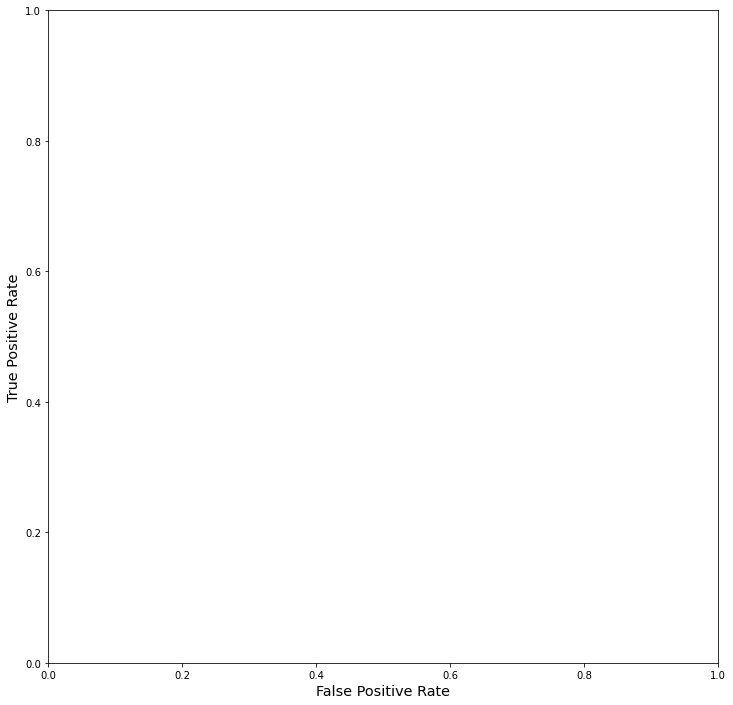

In [59]:
# 10 fold classificatio

plt.figure(figsize=(12, 12))
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')

for m in models:
    model = m['model']
    num_runs = 10
    res = cross_validation(X_sls, y_train, model, num_folds=10, n_runs=num_runs)
    print('{0}: {1}'.format(m['label'], res['metrics']))
    plt.plot(res['fpr'], res['tpr'], label=m['label']+', AUC='+str(round(res['metrics'][4],2)), linewidth=2)

leg = plt.legend(loc='best', fontsize='x-large')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

# Evaluate DNN model

In [80]:
dl_model.fit(X_train_sls, y_train, epochs=25,batch_size=32)

test_loss, test_acc = dl_model.evaluate(X_test_sls, y_test)
print('Test accuracy:', test_acc)

Epoch 1/25
5/5 [==============================] - 0s 6ms/step - loss: 0.0468 - accuracy: 0.9856
Epoch 2/25
5/5 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9856
Epoch 3/25
5/5 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9856
Epoch 4/25
5/5 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9856
Epoch 5/25
5/5 [==============================] - 0s 1ms/step - loss: 0.0468 - accuracy: 0.9856
Epoch 6/25
5/5 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9856
Epoch 7/25
5/5 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.9856
Epoch 8/25
5/5 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9856
Epoch 9/25
5/5 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9856
Epoch 10/25
5/5 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9856
Epoch 11/25
5/5 [======================

ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Training and Testing with top 3 model choosed from 10 fold cross validation

In [ ]:
# SVM with rbf kernel
from sklearn.svm import SVC
from sklearn.metrics import *
clf2 = SVC(kernel='rbf', probability=True)
clf2.fit(X_train_sls, y_train)

print('Training accuracy:', np.mean(clf2.predict(X_train_sls) == y_train)*100)
print('Test accuracy:', np.mean(clf2.predict(X_test_sls) == y_test)*100)

clf2_probs = clf2.predict_proba(X_test_sls)[:,1]

y_pred = clf2.predict(X_test_sls)

#evalutate
score = evaluate(clf2_probs, y_pred, y_test)

#calculate ROC curve
clf2_fpr, clf2_tpr, _ = roc_curve(y_test, clf2_probs)

# plot the roc curve for the model
pyplot.plot(clf2_fpr, clf2_tpr, marker='.', label='SVC-RBF')
# axis labels
pyplot.xlabel('False Positive Rate (positive label 0)')
pyplot.ylabel('True Positive Rate (positive label 0)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print("Evaluate score:\nACC\tSn\tSp\tMCC\tAUC\n", score)

In [ ]:
# SVM with rbf kernel
from sklearn.svm import SVC
clf2 = SVC(kernel='linear')
clf2.fit(X_train_sls, y_train)

print('Training accuracy:', clf2.score(X_train_sls, y_train))
print("Test:",clf2.score(X_test_sls, y_test))
metrics.plot_roc_curve(clf2, X_test_sls, y_test) 

In [ ]:
from xgboost.sklearn import XGBClassifier
seed = 7
np.random.seed(seed)
models = [
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(penalty="l2", random_state=0),
    },
    {
        'label': 'Logistic Regression 2',
        'model': SGDClassifier(loss="log", penalty="l2", random_state=0),
    },
    {
        'label' : 'SVM Linear',
        'model': SVC(kernel='linear',probability=True),
    },
    {
        'label' : 'KNN-15 nei',
        'model': KNeighborsClassifier(n_neighbors=11, p=2, n_jobs=-1),
    },
]

plt.figure(0).clf()

for m in models:
    model = m['model'] # select the model
    model.fit(X_train_sls, y_train) # train the model
    y_pred=model.predict(X_test_sls) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_sls)[:,1])
# Calculate Area under the curve to display on the plot
#     auc = metrics.auc(fpr,tpr)
    score = evaluate(model.predict_proba(X_test_sls)[:,1],y_pred, y_test)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (m['label'], score[4]))

    print("%s: \nEvaluate score:\nACC\tSn\tSp\tMCC\tAUC\n" % (m['label']), score)
# # Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")